In [1]:
path = 'C:/Users/2022080101/Desktop/Shopee_Dataset_2020/_DA_Marketing_Analytics'

In [2]:
import os

In [3]:
import numpy as np
import pandas as pd

In [4]:
file = os.listdir(path)

In [5]:
df = pd.read_csv(path+'/'+file[2])

In this notebook we will find the pattern under some observations about the variables.

In [6]:
df.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'row_id'],
      dtype='object')

In [7]:
df.head(10)

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
5,4,2019-07-16 00:00:00+08:00,246,44,5,8,70,3,7,13,6,18,45,0,0,7,0,5
6,5,2019-07-16 00:00:00+08:00,258,43,13,3,3,0,0,0,9,32,46,2,3,3,0,6
7,6,2019-07-16 00:00:00+08:00,288,49,163,1,28,0,0,0,4,19,45,0,5,7,0,7
8,1,2019-07-16 00:00:00+08:00,350,49,7,5,26,2,4,7,1,8,10,0,1,1,1,8
9,4,2019-07-16 00:00:00+08:00,417,44,7,10,12,2,6,14,6,11,17,0,1,1,0,9


In [8]:
df.open_flag.isna().sum()

0

Since this dataset is about whether users open e-mails or not, we define the conversion rate as:

$$ \frac{\text{the number of open_flag ==1}}{\text{total users}}$$

In [9]:
df['conversion'] = df['open_flag'].apply(lambda x: 1 if x == 1 else 0)

In [10]:
df.conversion.value_counts()

0    62083
1    11456
Name: conversion, dtype: int64

# Aggregate Conversion Rate

In [11]:
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions: 11456 out of 73539


In [12]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 15.58%


# Conversion Rates by Length of Subject Line

In [13]:
df.subject_line_length = df.subject_line_length.apply(lambda x: round(int((x + 9) / 10) * 10))

In [14]:
pd.DataFrame(
    df.groupby(
        by='subject_line_length'
    )['conversion'].sum()
)

,conversion
subject_line_length,
10,20
20,91
30,1329
40,4388
50,2899
60,2070
70,635
80,24


In [15]:
pd.DataFrame(
    df.groupby(
        by='subject_line_length'
    )['conversion'].count()
)

,conversion
subject_line_length,
10,283
20,348
30,7083
40,23964
50,20470
60,17032
70,4197
80,162


In [16]:
conversions_by_sublen = df.groupby(
    by='subject_line_length'
)['conversion'].sum() / df.groupby(
    by='subject_line_length'
)['conversion'].count() * 100.0

In [17]:
pd.DataFrame(conversions_by_sublen)

,conversion
subject_line_length,
10,7.067138
20,26.149425
30,18.763236
40,18.310800
50,14.162189
60,12.153593
70,15.129855
80,14.814815


In [18]:
import matplotlib.pyplot as plt

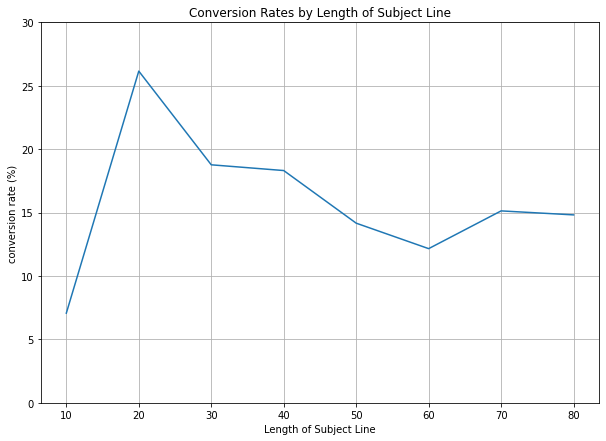

In [19]:
ax = conversions_by_sublen.plot(
    grid = True,
    figsize=(10, 7),
    title='Conversion Rates by Length of Subject Line'
)

ax.set_ylim([0, 30])
ax.set_xlabel('Length of Subject Line')
ax.set_ylabel('conversion rate (%)')

plt.show()

# Conversion Rates by Country Code

In [20]:
conversions_by_country = df.groupby(
    by='country_code'
)['conversion'].sum() / df.groupby(
    by='country_code'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_country)

,conversion
country_code,
1,8.109630
2,19.114891
3,13.138317
4,34.941288
5,21.531792
6,22.198075
7,24.422583


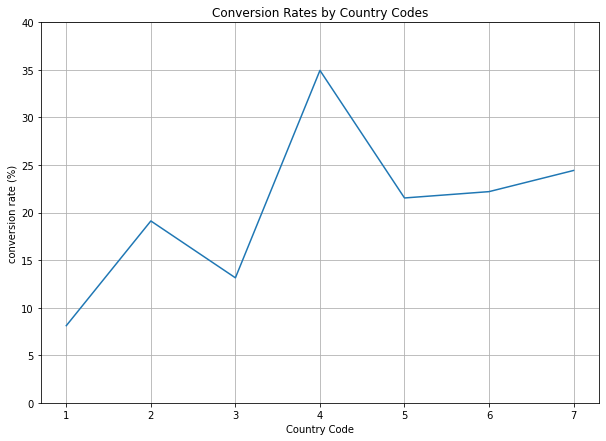

In [21]:
ax = conversions_by_country.plot(
    grid = True,
    figsize=(10, 7),
    title='Conversion Rates by Country Codes'
)

ax.set_ylim([0, 40])
ax.set_xlabel('Country Code')
ax.set_ylabel('conversion rate (%)')

plt.show()

# Conversion Rates by Last Open/Login/Checkout Days

In [22]:
df['last_open_day']=df['last_open_day'].replace('Never open',None)

In [23]:
df['last_open_day'] = df['last_open_day'].apply(int)

In [24]:
df['last_open_group'] = df['last_open_day'].apply(
    lambda x: '[0, 10)' if x < 10 else '[10, 20)' if x < 20 \
        else '[20, 30)' if x < 30 else '[30, 60)' if x < 60 \
        else '60+' if x > 60 else 'Never Open'
)

In [25]:
pd.DataFrame(
    df.groupby(
        by='last_open_group'
    )['conversion'].sum()
)

,conversion
last_open_group,
60+,394
Never Open,6
"[0, 10)",8540
"[10, 20)",1431
"[20, 30)",572
"[30, 60)",513


In [26]:
pd.DataFrame(
    df.groupby(
        by='last_open_group'
    )['conversion'].count()
)

,conversion
last_open_group,
60+,10525
Never Open,254
"[0, 10)",29540
"[10, 20)",13945
"[20, 30)",8820
"[30, 60)",10455


In [27]:
conversions_by_last_open_group = df.groupby(
    by='last_open_group'
)['conversion'].sum() / df.groupby(
    by='last_open_group'
)['conversion'].count() * 100.0

In [28]:
pd.DataFrame(conversions_by_last_open_group)

,conversion
last_open_group,
60+,3.743468
Never Open,2.362205
"[0, 10)",28.909953
"[10, 20)",10.261743
"[20, 30)",6.485261
"[30, 60)",4.906743


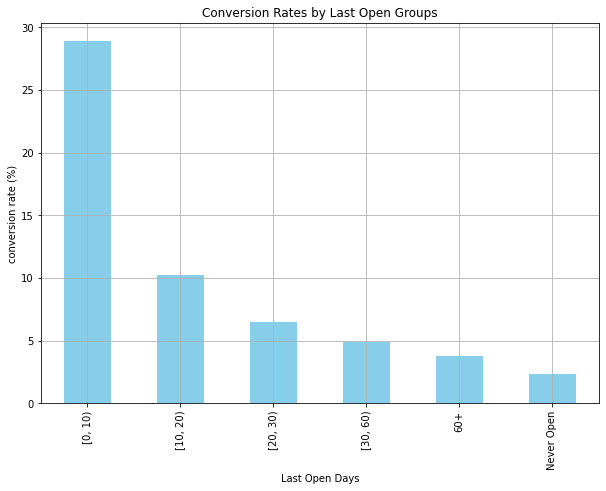

In [29]:
ax = conversions_by_last_open_group.loc[
    ['[0, 10)', '[10, 20)', '[20, 30)', '[30, 60)', '60+', 'Never Open']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Last Open Groups'
)

ax.set_xlabel('Last Open Days')
ax.set_ylabel('conversion rate (%)')

plt.show()

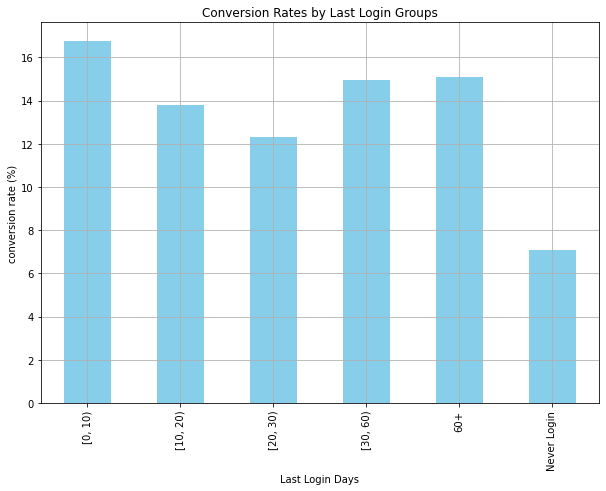

In [30]:
df['last_login_day']=df['last_login_day'].replace('Never login',None).apply(int)
df['last_login_day'] = df['last_login_day'].apply(
    lambda x: '[0, 10)' if x < 10 else '[10, 20)' if x < 20 \
        else '[20, 30)' if x < 30 else '[30, 60)' if x < 60 \
        else '60+' if x > 60 else 'Never Login'
)
conversions_by_last_login_group = df.groupby(
    by='last_login_day'
)['conversion'].sum() / df.groupby(
    by='last_login_day'
)['conversion'].count() * 100.0

ax = conversions_by_last_login_group.loc[
    ['[0, 10)', '[10, 20)', '[20, 30)', '[30, 60)', '60+', 'Never Login']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Last Login Groups'
)

ax.set_xlabel('Last Login Days')
ax.set_ylabel('conversion rate (%)')

plt.show()

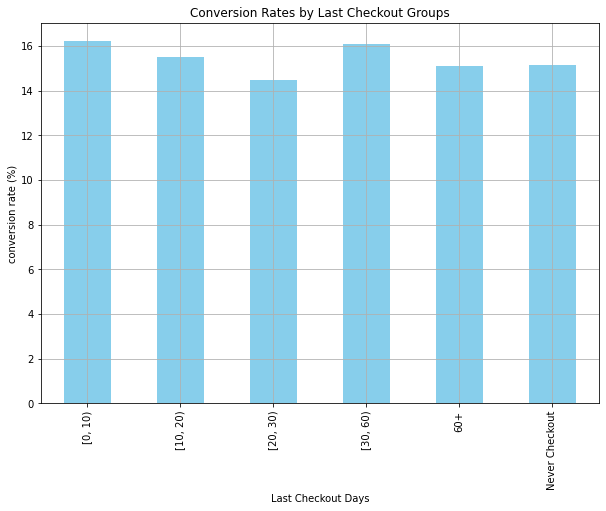

In [31]:
df['last_checkout_day']=df['last_checkout_day'].replace('Never checkout',None).apply(int)
df['last_checkout_day'] = df['last_checkout_day'].apply(
    lambda x: '[0, 10)' if x < 10 else '[10, 20)' if x < 20 \
        else '[20, 30)' if x < 30 else '[30, 60)' if x < 60 \
        else '60+' if x > 60 else 'Never Checkout'
)
conversions_by_last_checkout_group = df.groupby(
    by='last_checkout_day'
)['conversion'].sum() / df.groupby(
    by='last_checkout_day'
)['conversion'].count() * 100.0

ax = conversions_by_last_checkout_group.loc[
    ['[0, 10)', '[10, 20)', '[20, 30)', '[30, 60)', '60+', 'Never Checkout']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Last Checkout Groups'
)

ax.set_xlabel('Last Checkout Days')
ax.set_ylabel('conversion rate (%)')

plt.show()

Next, we define the frequency of open e-mails/logins/checkouts in short/mid/long term.

In [32]:
df['open_count_short_term_freq'] = df['open_count_last_10_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 3 \
        else 'Often' if x < 5 else 'Frequently')

In [33]:
pd.pivot_table(df, values='open_flag', index='open_count_short_term_freq', columns='conversion', aggfunc=len)

conversion,0,1
open_count_short_term_freq,,
Frequently,1057,2932
Often,2714,2676
Seldom,13282,3472
Zero,45030,2376


In [34]:
conversions_by_short_term_open_freq_df = pd.pivot_table(
    df, values='open_flag', index='open_count_short_term_freq', columns='conversion', aggfunc=len)

In [35]:
conversions_by_short_term_open_freq_df.columns = ['non_conversions', 'conversions']

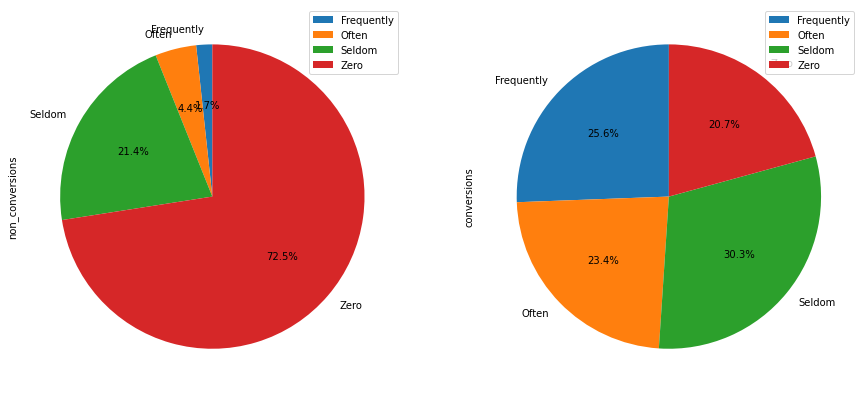

In [36]:
conversions_by_short_term_open_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [37]:
df['open_count_mid_term_freq'] = df['open_count_last_30_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 6 \
        else 'Often' if x < 15 else 'Frequently')

In [38]:
conversions_by_mid_term_open_freq_df = pd.pivot_table(
    df, values='open_flag', index='open_count_mid_term_freq', columns='conversion', aggfunc=len)

In [39]:
conversions_by_mid_term_open_freq_df.columns = ['non_conversions', 'conversions']

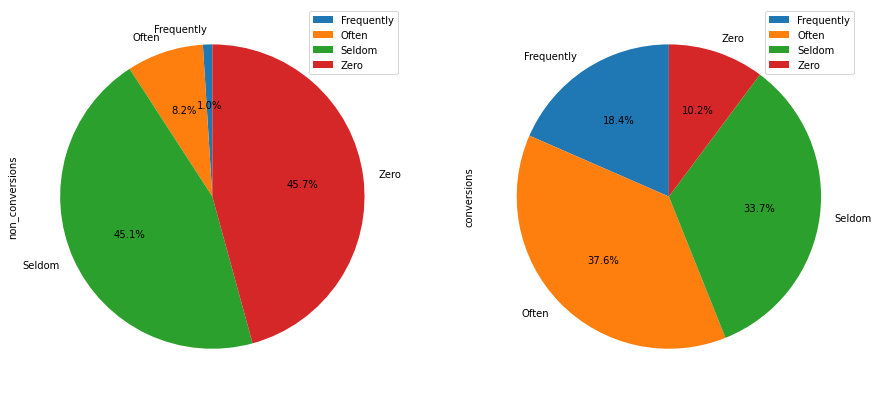

In [40]:
conversions_by_mid_term_open_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [41]:
df['open_count_long_term_freq'] = df['open_count_last_60_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 12 \
        else 'Often' if x < 30 else 'Frequently')

In [42]:
conversions_by_long_term_open_freq_df = pd.pivot_table(
    df, values='open_flag', index='open_count_long_term_freq', columns='conversion', aggfunc=len)

In [43]:
conversions_by_long_term_open_freq_df.columns = ['non_conversions', 'conversions']

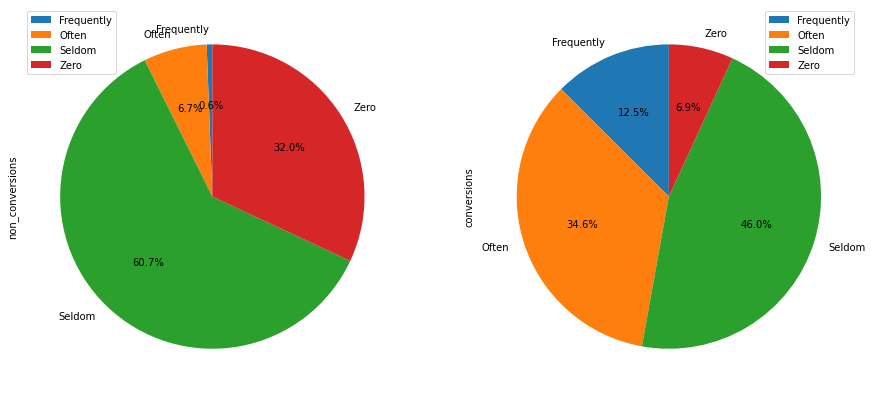

In [44]:
conversions_by_long_term_open_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

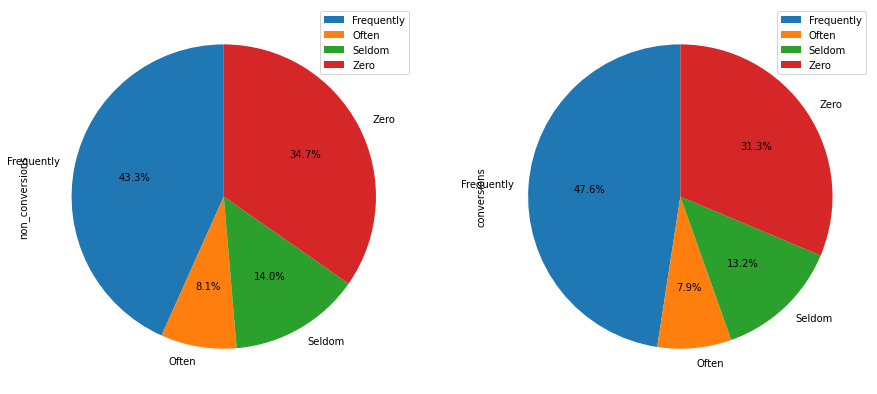

In [45]:
df['login_count_short_term_freq'] = df['login_count_last_10_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 3 \
        else 'Often' if x < 5 else 'Frequently')
conversions_by_short_term_login_freq_df = pd.pivot_table(
    df, values='open_flag', index='login_count_short_term_freq', columns='conversion', aggfunc=len)
conversions_by_short_term_login_freq_df.columns = ['non_conversions', 'conversions']
conversions_by_short_term_login_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

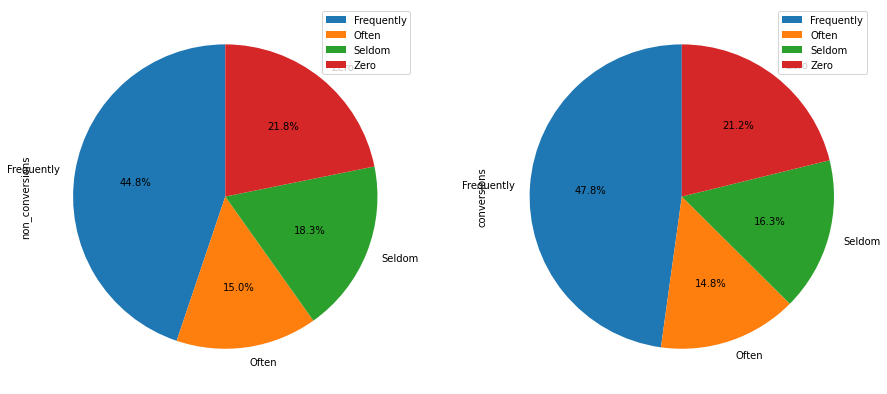

In [46]:
df['login_count_mid_term_freq'] = df['login_count_last_30_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 6 \
        else 'Often' if x < 15 else 'Frequently')
conversions_by_mid_term_login_freq_df = pd.pivot_table(
    df, values='open_flag', index='login_count_mid_term_freq', columns='conversion', aggfunc=len)
conversions_by_mid_term_login_freq_df.columns = ['non_conversions', 'conversions']
conversions_by_mid_term_login_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

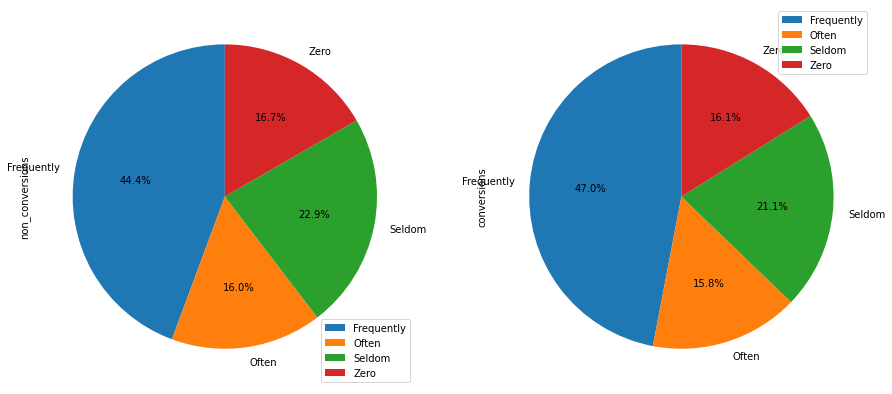

In [47]:
df['login_count_long_term_freq'] = df['login_count_last_60_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 12 \
        else 'Often' if x < 30 else 'Frequently')
conversions_by_long_term_login_freq_df = pd.pivot_table(
    df, values='open_flag', index='login_count_long_term_freq', columns='conversion', aggfunc=len)
conversions_by_long_term_login_freq_df.columns = ['non_conversions', 'conversions']
conversions_by_long_term_login_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

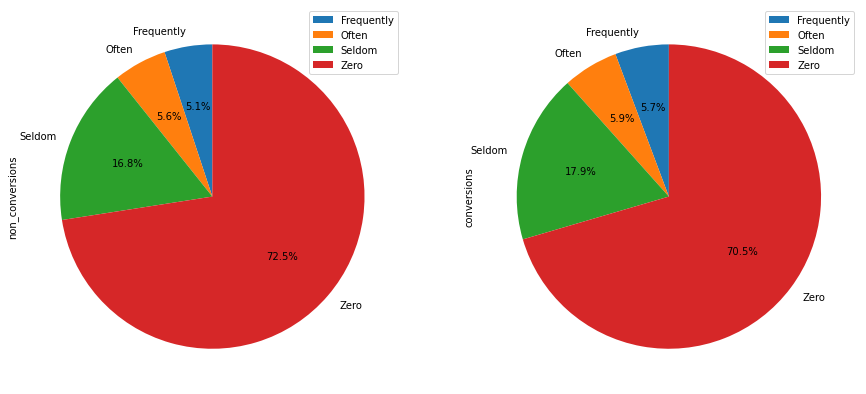

In [48]:
df['checkout_count_short_term_freq'] = df['checkout_count_last_10_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 3 \
        else 'Often' if x < 5 else 'Frequently')
conversions_by_short_term_checkout_freq_df = pd.pivot_table(
    df, values='open_flag', index='checkout_count_short_term_freq', columns='conversion', aggfunc=len)
conversions_by_short_term_checkout_freq_df.columns = ['non_conversions', 'conversions']
conversions_by_short_term_checkout_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

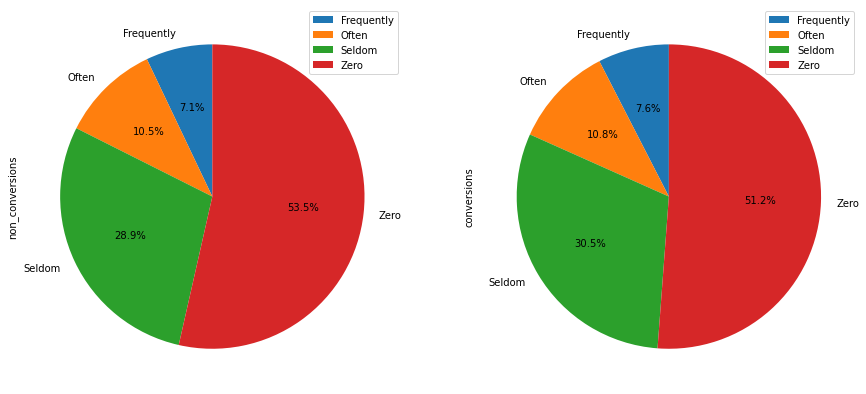

In [49]:
df['checkout_count_mid_term_freq'] = df['checkout_count_last_30_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 5 \
        else 'Often' if x < 10 else 'Frequently')
conversions_by_mid_term_checkout_freq_df = pd.pivot_table(
    df, values='open_flag', index='checkout_count_mid_term_freq', columns='conversion', aggfunc=len)
conversions_by_mid_term_checkout_freq_df.columns = ['non_conversions', 'conversions']
conversions_by_mid_term_checkout_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

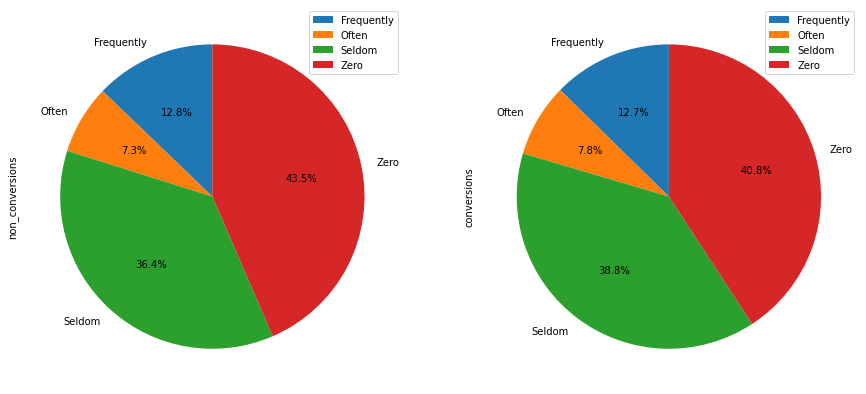

In [50]:
df['checkout_count_long_term_freq'] = df['checkout_count_last_60_days'].apply(
    lambda x: 'Zero' if x < 1 else 'Seldom' if x < 8 \
        else 'Often' if x < 12 else 'Frequently')
conversions_by_long_term_checkout_freq_df = pd.pivot_table(
    df, values='open_flag', index='checkout_count_long_term_freq', columns='conversion', aggfunc=len)
conversions_by_long_term_checkout_freq_df.columns = ['non_conversions', 'conversions']
conversions_by_long_term_checkout_freq_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()